## Training with TPrime 600GeV to 700GeV & all five As  background (tth, thq, VH, VHq, and gg)

>This is the training of signal and bacground to get the output as a HDF5 file. The output file futher used to test on the TPrime at 600 GeV, 625GeV, 650GeV, 675GeV, 700GeV, 800GeV, 900GeV, 1000GeV, 1100GeV, and 1200GeV as signal.
<br>
> All the training is to check on how our model behaves.<br>
> NExt also check the btraining output with the all other testing on the datafiles.<br>
> The output after the testing on the differrent files were saved in a root file.
> Further plotted the [stacked plot](https://github.com/raj2022/HiggsAnalysis/blob/main/Final_Analysis/Stacked_plotting_600_700_with_increased_nodes.ipynb)


In [1]:
#importing basic modules
import numpy as np
import pandas as pd
import math
import glob
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
sns.set_palette(sns.color_palette("muted"))

#import all modules related to Keras
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, activations
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from keras.optimizers import adam, adadelta, adagrad

#importing all ROOT modules
import ROOT
from itertools import tee, islice
from ROOT import TFile, TCanvas, TPad, TPaveLabel, TPaveText, TTree, TH1F, TF1
from root_numpy import root2array, tree2array, array2tree, array2root
from ROOT import gROOT, AddressOf
from root_numpy import root2array, rec2array

#importing sklearn modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.ticker as ticker
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import tree

Using TensorFlow backend.


Welcome to JupyROOT 6.20/06


# Importing and Reading all the signal datasets 
Tprime from 600GeV to 700GeV will be used as the signal. Importing from the eos.

In [2]:
Tprime_600 = '/eos/user/p/prsaha/for_Shivam/output_TprimeBToTH_Hgg_M-600_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root'
Tprime_625 = '/eos/user/p/prsaha/for_Shivam/output_TprimeBToTH_Hgg_M-625_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root'
Tprime_650 = '/eos/user/p/prsaha/for_Shivam/output_TprimeBToTH_Hgg_M-650_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root'
Tprime_675 = '/eos/user/p/prsaha/for_Shivam/output_TprimeBToTH_Hgg_M-675_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root'
Tprime_700 = '/eos/user/p/prsaha/for_Shivam/output_TprimeBToTH_Hgg_M-700_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root'


### Reading from the trees in the .root files

In [3]:
treeName_600 = "tagsDumper/trees/Tprime_600_13TeV_THQLeptonicTag"
treeName_625 = "tagsDumper/trees/Tprime_625_13TeV_THQLeptonicTag"
treeName_650 = "tagsDumper/trees/Tprime_650_13TeV_THQLeptonicTag"
treeName_675 = "tagsDumper/trees/Tprime_675_13TeV_THQLeptonicTag"
treeName_700 = "tagsDumper/trees/Tprime_700_13TeV_THQLeptonicTag"

#### All the input variables from the ROOT file used in the training

In [4]:
columns = ['dipho_leadPt',  'dipho_mass',  'dipho_leadEta',  'dipho_subleadEta', 'dipho_leadIDMVA',
           'dipho_subleadIDMVA',              'dipho_lead_haspixelseed',   'dipho_sublead_haspixelseed',
           'n_jets',  'n_bjets',  'n_centraljets',  'lepton_charge',   'lepton_leadPt',  'lepton_leadEta',
            'fwdjet1_pt',       'fwdjet1_eta', 'fwdjet1_discr', 'top_mt',   'dr_tHchainfwdjet',  'dr_leptonbjet',
             'dr_leptonfwdjet',      'dr_bjetfwdjet',      'dr_leadphofwdjet',    'dr_subleadphofwdjet',
             'bjet1_pt',  'bjet2_pt',  'bjet3_pt', 'bjet1_eta', 'bjet2_eta',    'bjet3_eta', 'bjet1_discr',
             'bjet2_discr',   'bjet3_discr',     'jet1_pt',     'jet2_pt',  'jet3_pt',   'jet1_eta', 'jet2_eta',
             'jet3_eta',              'jet1_discr',              'jet2_discr',              'jet3_discr']
             


#### Reading the input variables from the ROOT file used in the training

In [5]:
signal_Tprime_600 = root2array(Tprime_600, treeName_600, columns)   #Signal TPrime at 600GeV
signal_Tprime_625 = root2array(Tprime_625, treeName_625, columns)   #Signal TPrime at 625GeV
signal_Tprime_650 = root2array(Tprime_650, treeName_650, columns)   #Signal TPrime at 650GeV
signal_Tprime_675 = root2array(Tprime_675, treeName_675, columns)   #Signal TPrime at 675GeV
signal_Tprime_700 = root2array(Tprime_700, treeName_700, columns)   #Signal TPrime at 700GeV


##### Converting into the pandas dataframes

In [6]:
signal_Tprime600= pd.DataFrame(signal_Tprime_600)
signal_Tprime625= pd.DataFrame(signal_Tprime_625)
signal_Tprime650= pd.DataFrame(signal_Tprime_650)
signal_Tprime675= pd.DataFrame(signal_Tprime_675)
signal_Tprime700= pd.DataFrame(signal_Tprime_700)

In [7]:
# Reading the shapes and size of the data
print('shape of the signal_Tprime at 600GeV is:',signal_Tprime600.shape, '\n')
print('shape of the signal_Tprime at 625GeV is:',signal_Tprime625.shape, '\n')
print('shape of the signal_Tprime at 650GeV is:',signal_Tprime650.shape, '\n')
print('shape of the signal_Tprime at 675GeV is:',signal_Tprime675.shape, '\n')
print('shape of the signal_Tprime at 700GeV is:',signal_Tprime700.shape, '\n')

shape of the signal_Tprime at 600GeV is: (81013, 42) 

shape of the signal_Tprime at 625GeV is: (84479, 42) 

shape of the signal_Tprime at 650GeV is: (91640, 42) 

shape of the signal_Tprime at 675GeV is: (88237, 42) 

shape of the signal_Tprime at 700GeV is: (92703, 42) 



# Importing and Reading all the Background datasets 
ttH, tHq, VH, VHq, ggH will be used as the signal.

In [8]:
back_1 = '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_TTGG_0Jets_TuneCP5_13TeV_amcatnlo_madspin_pythia8.root'
back_01= '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_ttHJetToGG_M125_13TeV_amcatnloFXFX_madspin_pythia8.root'
back_02 = '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_VBFHToGG_M125_13TeV_amcatnlo_pythia8.root'
back_03 = '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_VHToGG_M125_13TeV_amcatnloFXFX_madspin_pythia8.root'
back_04 = '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_THQ_ctcvcp_HToGG_M125_13TeV-madgraph-pythia8.root'
back_05= '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_GluGluHToGG_M125_TuneCP5_13TeV-amcatnloFXFX-pythia8.root'

#### Reading from the trees

In [12]:
treeName_back_1 ="tagsDumper/trees/ttgg_13TeV_THQLeptonicTag" 
treeName_back_05 = "tagsDumper/trees/ggh_125_13TeV_THQLeptonicTag"
treeName_back_04 = "tagsDumper/trees/thq_125_13TeV_THQLeptonicTag"
treeName_back_03 = "tagsDumper/trees/vh_125_13TeV_THQLeptonicTag"
treeName_back_02 = 'tagsDumper/trees/vbf_125_13TeV_THQLeptonicTag'
treeName_back_01 = "tagsDumper/trees/tth_125_13TeV_THQLeptonicTag"


In [13]:
columns = ['dipho_leadPt',  'dipho_mass',  'dipho_leadEta',  'dipho_subleadEta', 'dipho_leadIDMVA',
           'dipho_subleadIDMVA',              'dipho_lead_haspixelseed',   'dipho_sublead_haspixelseed',
           'n_jets',  'n_bjets',  'n_centraljets',  'lepton_charge',   'lepton_leadPt',  'lepton_leadEta',
            'fwdjet1_pt',       'fwdjet1_eta', 'fwdjet1_discr', 'top_mt',   'dr_tHchainfwdjet',  'dr_leptonbjet',
             'dr_leptonfwdjet',      'dr_bjetfwdjet',      'dr_leadphofwdjet',    'dr_subleadphofwdjet',
             'bjet1_pt',  'bjet2_pt',  'bjet3_pt', 'bjet1_eta', 'bjet2_eta',    'bjet3_eta', 'bjet1_discr',
             'bjet2_discr',   'bjet3_discr',     'jet1_pt',     'jet2_pt',  'jet3_pt',   'jet1_eta', 'jet2_eta',
             'jet3_eta',              'jet1_discr',              'jet2_discr',              'jet3_discr']
             

In [14]:
back_ttgg = root2array(back_1, treeName_back_1, columns)     # ttgg background(Not using this)
back_tth = root2array(back_01, treeName_back_01, columns)      
back_vbf = root2array(back_02, treeName_back_02, columns)
back_vh = root2array(back_03, treeName_back_03, columns)
back_thq = root2array(back_04, treeName_back_04, columns)
back_ggh = root2array(back_05, treeName_back_05, columns)


In [15]:
back_tth = pd.DataFrame(back_tth)          #tth background dataframe 
back_vbf = pd.DataFrame(back_vbf)             #vbf background dataframe 
back_vh = pd.DataFrame(back_vh)             #vh background dataframe 
back_thq = pd.DataFrame(back_thq) #thq background dataframe 
back_ggh = pd.DataFrame(back_ggh) #ggh background dataframe 
back_ttgg = pd.DataFrame(back_ttgg) #ttgg as the background converted into the data frame

In [16]:
print('Shape of the ttgg backgground', back_ttgg.shape, '\n')
print('Shape of the tth backgground', back_tth.shape, '\n')
print('Shape of the thq backgground', back_thq.shape, '\n')
print('Shape of the ggh backgground', back_ggh.shape, '\n')
print('Shape of the vh backgground', back_vh.shape, '\n')
print('Shape of the vbf backgground', back_vbf.shape, '\n')
# print('Total shape', back_ttgg.shape + back_tth.shape + back_thq.shape + back_ggh.shape+ back_vh.shape+back_vbf.shape )


Shape of the ttgg backgground (55847, 42) 

Shape of the tth backgground (92486, 42) 

Shape of the thq backgground (338874, 42) 

Shape of the ggh backgground (529, 42) 

Shape of the vh backgground (8080, 42) 

Shape of the vbf backgground (1199, 42) 



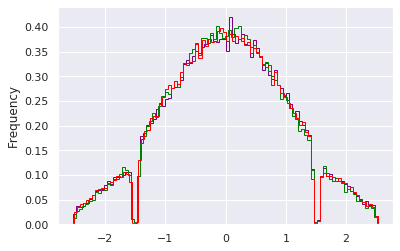

In [17]:
signal_Tprime600['dipho_subleadEta'].plot.hist(bins=100, histtype = 'step', edgecolor = 'purple', alpha = 1,  density=True, fill= False,color = 'orange', label = 'data' )
signal_Tprime700['dipho_subleadEta'].plot.hist(bins=100, histtype = 'step', edgecolor = 'green', alpha = 1,  density=True, fill= False,color = 'red', label = 'data' )
back_tth['dipho_subleadEta'].plot.hist(bins=100, histtype = 'step', edgecolor = 'red', alpha = 1,  density=True, fill= False,color = 'red', label = 'data' )


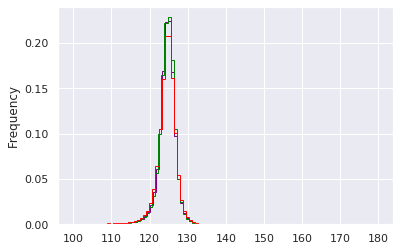

In [18]:
signal_Tprime600['dipho_mass'].plot.hist(bins=100, histtype = 'step', edgecolor = 'purple', alpha = 1,  density=True, fill= False,color = 'orange', label = 'data' )
signal_Tprime700['dipho_mass'].plot.hist(bins=100, histtype = 'step', edgecolor = 'green', alpha = 1,  density=True, fill= False,color = 'red', label = 'data' )
back_tth['dipho_mass'].plot.hist(bins=100, histtype = 'step', edgecolor = 'red', alpha = 1,  density=True, fill= False,color = 'red', label = 'data' )


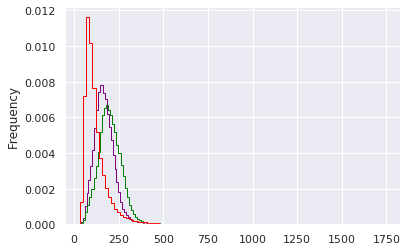

In [19]:

signal_Tprime600['dipho_leadPt'].plot.hist(bins=100, histtype = 'step', edgecolor = 'purple', alpha = 1,  density=True, fill= False,color = 'orange', label = 'data' )
signal_Tprime700['dipho_leadPt'].plot.hist(bins=100, histtype = 'step', edgecolor = 'green', alpha = 1,  density=True, fill= False,color = 'red', label = 'data' )
back_tth['dipho_leadPt'].plot.hist(bins=100, histtype = 'step', edgecolor = 'red', alpha = 1,  density=True, fill= False,color = 'red', label = 'data' )


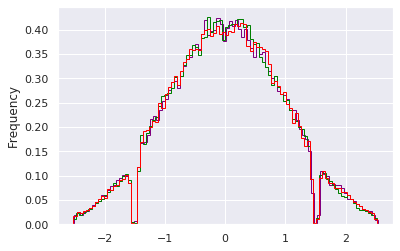

In [20]:
signal_Tprime600['dipho_leadEta'].plot.hist(bins=100, histtype = 'step', edgecolor = 'purple', alpha = 1,  density=True, fill= False,color = 'orange', label = 'data' )
signal_Tprime700['dipho_leadEta'].plot.hist(bins=100, histtype = 'step', edgecolor = 'green', alpha = 1,  density=True, fill= False,color = 'red', label = 'data' )
back_tth['dipho_leadEta'].plot.hist(bins=100, histtype = 'step', edgecolor = 'red', alpha = 1,  density=True, fill= False,color = 'red', label = 'data' )


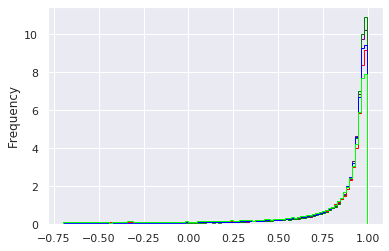

In [21]:

signal_Tprime600['dipho_leadIDMVA'].plot.hist(bins=100, histtype = 'step', edgecolor = 'purple', alpha = 1,  density=True, fill= False,color = 'orange', label = 'data' )
signal_Tprime700['dipho_leadIDMVA'].plot.hist(bins=100, histtype = 'step', edgecolor = 'green', alpha = 1,  density=True, fill= False,color = 'red', label = 'data' )
back_tth['dipho_leadIDMVA'].plot.hist(bins=100, histtype = 'step', edgecolor = 'red', alpha = 1,  density=True, fill= False,color = 'red', label = 'data' )
back_thq['dipho_leadIDMVA'].plot.hist(bins=100, histtype = 'step', edgecolor = 'blue', alpha = 1,  density=True, fill= False,color = 'red', label = 'data' )
back_ttgg['dipho_leadIDMVA'].plot.hist(bins=100, histtype = 'step', edgecolor = 'lime', alpha = 1,  density=True, fill= False,color = 'red', label = 'data' )


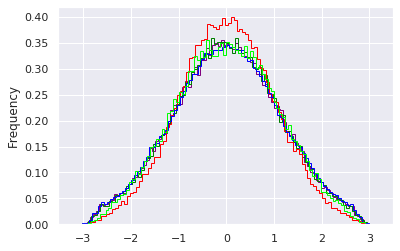

In [22]:
signal_Tprime600['bjet1_eta'].plot.hist(bins=100, histtype = 'step', edgecolor = 'purple', alpha = 1,  density=True, fill= False,color = 'orange', label = 'data' )
signal_Tprime700['bjet1_eta'].plot.hist(bins=100, histtype = 'step', edgecolor = 'green', alpha = 1,  density=True, fill= False,color = 'red', label = 'data' )
back_tth['bjet1_eta'].plot.hist(bins=100, histtype = 'step', edgecolor = 'red', alpha = 1,  density=True, fill= False,color = 'red', label = 'data' )
back_thq['bjet1_eta'].plot.hist(bins=100, histtype = 'step', edgecolor = 'blue', alpha = 1,  density=True, fill= False,color = 'red', label = 'data' )
back_ttgg['bjet1_eta'].plot.hist(bins=100, histtype = 'step', edgecolor = 'lime', alpha = 1,  density=True, fill= False,color = 'red', label = 'data' )


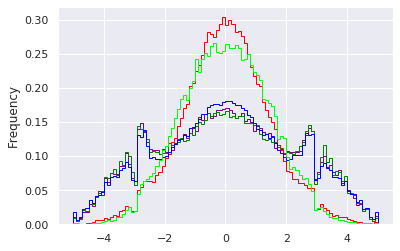

In [23]:
signal_Tprime600['jet2_eta'].plot.hist(bins=100, histtype = 'step', edgecolor = 'purple', alpha = 1,  density=True, fill= False,color = 'orange', label = 'data' )
signal_Tprime700['jet2_eta'].plot.hist(bins=100, histtype = 'step', edgecolor = 'green', alpha = 1,  density=True, fill= False,color = 'red', label = 'data' )
back_tth['jet2_eta'].plot.hist(bins=100, histtype = 'step', edgecolor = 'red', alpha = 1,  density=True, fill= False,color = 'red', label = 'data' )
back_thq['jet2_eta'].plot.hist(bins=100, histtype = 'step', edgecolor = 'blue', alpha = 1,  density=True, fill= False,color = 'red', label = 'data' )
back_ttgg['jet2_eta'].plot.hist(bins=100, histtype = 'step', edgecolor = 'lime', alpha = 1,  density=True, fill= False,color = 'red', label = 'data' )


## Training over the Tprime  600 GeV to 700GeV with all combined background

**Training of the TPrime from 600 GeV to 700GeV**. first combing all the datafiles into one further doing the training on the model of the DNN.

In [24]:
signal = pd.concat((signal_Tprime600, signal_Tprime625, signal_Tprime650, signal_Tprime675),axis = 0)
backgr = pd.concat((back_tth, back_ggh, back_thq, back_vbf, back_vh), axis=0)

In [25]:
print('Total signal shape is:', signal.shape, '\n')
print('Total background shape is:', backgr.shape)

Total signal shape is: (345369, 42) 

Total background shape is: (441168, 42)


In [26]:
X = np.concatenate((signal, backgr))
y = np.concatenate((np.ones(signal.shape[0]),
                    np.zeros(backgr.shape[0])))

In [27]:
X.shape, y.shape

((786537, 42), (786537,))

In [28]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state =5)


In [29]:
X_train.shape, y_train.shape

((526979, 42), (526979,))

In [30]:
X_test.shape, y_test.shape

((259558, 42), (259558,))

In [31]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import keras
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.utils.vis_utils import plot_model
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adadelta
from tensorflow.keras import regularizers
from tensorflow.keras.initializers import RandomNormal, Constant
from keras import callbacks
from keras.models import load_model

In [32]:
clf = Sequential()
# clf.add(LSTM(1, return_sequences=True ))
clf.add(BatchNormalization(input_shape = (42,)))
initializer =tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)
# clf.add(Dropout(0.3))
clf.add(Dense(1024, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'random_uniform' ,name = 'dense_1'))
clf.add(BatchNormalization())
clf.add(Dropout(0.3))
clf.add(Dense(512, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'random_uniform', name = 'dense_2'))
clf.add(Dropout(0.35))
clf.add(Dense(512, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'random_uniform' ,name = 'dense_22'))
clf.add(BatchNormalization())
clf.add(Dropout(0.35))
clf.add(Dense(256, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'random_uniform', name = 'dense_3'))
clf.add(BatchNormalization())
clf.add(Dropout(0.40))
clf.add(Dense(128, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'random_uniform' ,name = 'dense_4'))
clf.add(BatchNormalization())
clf.add(Dropout(0.40))
clf.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'random_uniform', name = 'dense_5'))
clf.add(BatchNormalization(momentum=0.99,epsilon=0.001,beta_initializer=RandomNormal(mean=0.0, stddev=0.05),gamma_initializer=Constant(value=0.9)))
clf.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'random_uniform', name = 'dense_6'))
clf.add(BatchNormalization(momentum=0.99,epsilon=0.001,beta_initializer=RandomNormal(mean=0.0, stddev=0.05),gamma_initializer=Constant(value=0.9)))
clf.add(Dense(32, activation = 'relu', name = 'dense_7'))
clf.add(Dropout(0.45))
clf.add(BatchNormalization(momentum=0.99,epsilon=0.001,beta_initializer=RandomNormal(mean=0.0, stddev=0.05),gamma_initializer=Constant(value=0.9)))

# Output
clf.add(Dense(1, activation = 'sigmoid',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'random_uniform', name = 'output'))
#compile model

# opt = SGD(lr=0.01, momentum=0.9)
clf.compile(loss = 'binary_crossentropy', 
            optimizer= 'adam',
            metrics=['accuracy'])
print('Summary of the built model...')
print(clf.summary())
# plot_model(clf, to_file='/eos/home-s/sraj/M.Sc._Thesis/Plot/''clf_plot_multiclass___.png', show_shapes=True, show_layer_names=True)

W0405 07:35:45.852679 140225884534592 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0405 07:35:45.910729 140225884534592 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0405 07:35:46.057385 140225884534592 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0405 07:35:46.397439 140225884534592 deprecation.py:506] From /cvmfs/sft.cern.ch/lc

Summary of the built model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 42)                168       
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              44032     
_________________________________________________________________
batch_normalization_2 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)      

In [67]:
# # simple early stopping
# early_stopper = callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="auto")
# model_check_point = callbacks.ModelCheckpoint("model(Training with Tprime 600-700GeV with all backgrounds).h5", monitor = 'val_loss', verbose=True, 
#                                               save_best_only=True, mode='auto')
# # fit model
# history = clf.fit(X_train, y_train, validation_split = 0.30, batch_size= 9000, epochs=100, verbose=1, callbacks=[early_stopper, model_check_point])
# evaluate the model

history = clf.fit(X_train, y_train, validation_split = 0.30, batch_size= 9000, epochs=100, verbose=1)

Train on 368885 samples, validate on 158094 samples
Epoch 1/100
368885/368885 [==============================] - 50s 135us/step - loss: 1.0635 - acc: 0.7125 - val_loss: 0.6944 - val_acc: 0.7643
Epoch 2/100
368885/368885 [==============================] - 34s 92us/step - loss: 0.5812 - acc: 0.7742 - val_loss: 0.5641 - val_acc: 0.7712
Epoch 3/100
368885/368885 [==============================] - 29s 79us/step - loss: 0.5017 - acc: 0.7792 - val_loss: 0.5208 - val_acc: 0.7743
Epoch 4/100
368885/368885 [==============================] - 33s 89us/step - loss: 0.4843 - acc: 0.7823 - val_loss: 0.5251 - val_acc: 0.7630
Epoch 5/100
368885/368885 [==============================] - 38s 104us/step - loss: 0.4775 - acc: 0.7841 - val_loss: 0.5194 - val_acc: 0.7727
Epoch 6/100
368885/368885 [==============================] - 32s 85us/step - loss: 0.4733 - acc: 0.7858 - val_loss: 0.4842 - val_acc: 0.7818
Epoch 7/100
368885/368885 [==============================] - 31s 84us/step - loss: 0.4700 - acc: 0.7

2022-04-04 19:16:29.691211: W tensorflow/core/framework/allocator.cc:107] Allocation of 36864000 exceeds 10% of system memory.
2022-04-04 19:16:29.822500: W tensorflow/core/framework/allocator.cc:107] Allocation of 36864000 exceeds 10% of system memory.
2022-04-04 19:16:29.853912: W tensorflow/core/framework/allocator.cc:107] Allocation of 36864000 exceeds 10% of system memory.
2022-04-04 19:16:29.895710: W tensorflow/core/framework/allocator.cc:107] Allocation of 36864000 exceeds 10% of system memory.
2022-04-04 19:16:29.902692: W tensorflow/core/framework/allocator.cc:107] Allocation of 36864000 exceeds 10% of system memory.


In [68]:
# Final evaluation of the model for DNN
# Testing Outputs
scores = clf.evaluate(X_train, y_train, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

526979/526979 [==============================] - 61s 115us/step
Accuracy: 82.09%


In [69]:
# Final evaluation of the model for DNN
# Testing Outputs"$\pm$"
scores = clf.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

259558/259558 [==============================] - 30s 115us/step
Accuracy: 81.09%


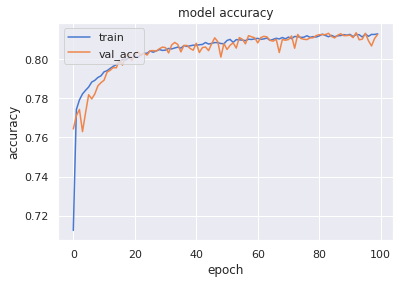

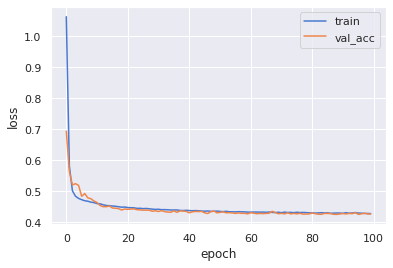

In [70]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val_acc'], loc='upper left')
# plt.savefig('/eos/user/s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_output/''model_accuracy_training_and_testing_TPrime_600-700GeV.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# plt.title('model loss,random_state=5, epoch =100,batch_size =900, verbose=0.25')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_acc'], loc='upper right')
# plt.savefig('/eos/user/s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_output/''model_loss_training_and_testing_TPrime_600-700GeV.png')
plt.show()

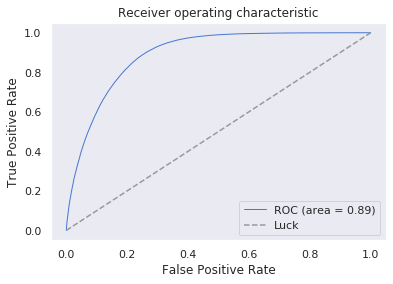

In [71]:
from sklearn.metrics import roc_curve, auc

decisions = clf.predict(X_test)

# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(y_test, decisions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))


plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
# plt.savefig('/eos/user/s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_output/'"ROC_curve_training_and_testing_TPrime_600-700GeV.png")
plt.show()

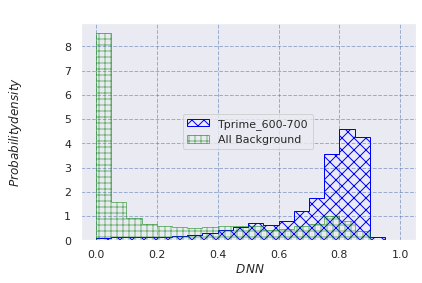

In [72]:
import matplotlib
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = clf.predict(X_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg_0 = tTest[y_test==0]
tSig_0 = tTest[y_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig_0 ,bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='Tprime_600-700')
n, bins, patches = plt.hist(tBkg_0, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'All Background')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
plt.title(' ')
# plt.savefig('/eos/user/s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_output/''output_TPrime600-700_on_testing_all_background.png')
plt.show()

#Comparision with the earlier one saved model on which I have  obtained the histogram Stacked

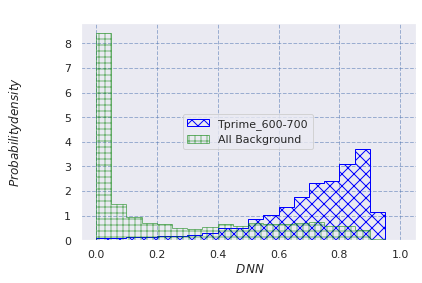

In [34]:
import matplotlib
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = loaded_model.predict(X_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg_0 = tTest[y_test==0]
tSig_0 = tTest[y_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig_0 ,bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='Tprime_600-700')
n, bins, patches = plt.hist(tBkg_0, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'All Background')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
plt.title(' ')
# plt.savefig('/eos/user/s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_output/''output_TPrime600-700_on_testing_all_background.png')
plt.show()

## Load the model

In [33]:
loaded_model = load_model("model(Training with Tprime 600-700GeV with all backgrounds).h5")

2022-04-05 07:36:19.718820: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2022-04-05 07:36:19.764441: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2194915000 Hz
2022-04-05 07:36:19.766910: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x17b43dc0 executing computations on platform Host. Devices:
2022-04-05 07:36:19.766945: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2022-04-05 07:36:20.595189: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line flag, not via 

# Method 1
In this method for the DATA imported:<br>
**Step 1:**
-  Concatante all the testing and training samples. just as this,
```python
signal = pd.concat((signal_Tprime600, signal_Tprime625, signal_Tprime650, signal_Tprime675),axis = 0)
backgr = pd.concat((back_tth, back_ggh, back_thq, back_vbf, back_vh), axis=0)
```
or<br>
```python
signal_1 = pd.concat((signal_Tprime800, signal_Tprime900 ),axis = 0)
backgr = pd.concat((back_tth, back_ggh, back_thq, back_vbf, back_vh), axis=0)
```

**Step 2:**
- Concatante the data, i.e. both signal and background.
```python
X = np.concatenate((signal, backgr))
y = np.concatenate((np.ones(signal.shape[0]),
                    np.zeros(backgr.shape[0])))
```
or<br>
```python
X_1 = np.concatenate((signal_1, backgr))
y_1 = np.concatenate((np.ones(signal_1.shape[0]),
                    np.zeros(backgr.shape[0])))
```

**Step 3:**
- Divide the combined data in test and train set, i.e. split it into train and test dataset. As
```python
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state =5)
```
or<br>
```python
X_1_train,X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.99, random_state =5)
```
<br>
<br>

**Step 4:**
From the loaded model, evaluate the on testing files,
```python
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_1_test, y_1_test)```


<br>
<br>

**Step 5:**
Find the testing output Scores
```python
# Final evaluation of the model for DNN
# Testing Outputs
scores = loaded_model.evaluate(X_1_test, y_1_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))
```
<br>
<br>

**Step 6:**

Plot the ROC Curve(***this method give more proper ROC output in comarision to the Method 2***)

```python
from sklearn.metrics import roc_curve, auc

decisions = loaded_model.predict(X_1_test)

# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(y_1_test, decisions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
# plt.savefig("ROC_curve.png")
plt.show()
```

**Step 7:**
Finally, Plot the output which is required using:

```python
import matplotlib
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = loaded_model.predict(X_1_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg_1 = tTest[y_1_test==0]
tSig_1 = tTest[y_1_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig_1, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='Tprime_600-700')
n, bins, patches = plt.hist(tBkg_1, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'All Background')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
plt.title(' ')
# plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_with_HDF5_files/''output_TPrime1200_all_background.png')
plt.show()
```




### Plotting with the original data file after testing 



In [36]:
data_file_01 = '/eos/user/p/prsaha/for_Shivam/output_allData_RunII.root'
treename_data_file_01 = "tagsDumper/trees/Data_13TeV_THQLeptonicTag"

In [37]:
data_File_001= root2array(data_file_01,treename_data_file_01,columns)

In [38]:
data_File_1 = pd.DataFrame(data_File_001)

# Method 2

After the data file get imported and converted into the pandas dataframes. Now we have do just testing on the model.

**Step 1:**
Give the test file as the one of the file name as done here, and do the *Step 4* and *Step 5* of the method 1 again
```python
X_3_test = data_File_1
y_3_test = np.ones(data_File_1.shape[0])

loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_3_test, y_3_test)

# Final evaluation of the model for DNN
# Testing Outputs
scores = loaded_model.evaluate(X_3_test, y_3_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))
```
**Step 2:**
Just do the plotting as here there are no data loss compared to the earlier method (Earlier you were Dividing the concataned data, where there was the possiblity for the loss of the data)

```python
import matplotlib
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = loaded_model.predict(X_1_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg_1 = tTest[y_1_test==0]
tSig_1 = tTest[y_1_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig_1, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='Tprime_800-900')
n, bins, patches = plt.hist(tBkg_1, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'All Background')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
plt.title(' ')
# plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_with_HDF5_files/''output_TPrime1200_all_background.png')
plt.show()
```
***In this method the ROC Curve will be not there or it would be very less***

In [39]:
X_3_test = data_File_1
y_3_test = np.ones(data_File_1.shape[0])

loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_3_test, y_3_test)

# Final evaluation of the model for DNN
# Testing Outputs
scores = loaded_model.evaluate(X_3_test, y_3_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))



2400/2400 [==============================] - 0s 83us/step
Accuracy: 8.67%


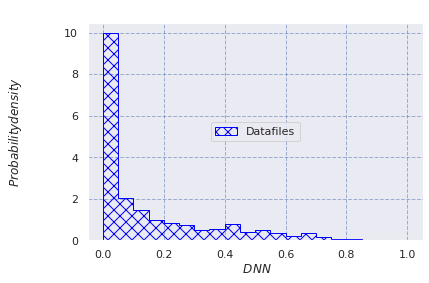

In [40]:
import matplotlib
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = loaded_model.predict(X_3_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg_3 = tTest[y_3_test==0]
tSig_3 = tTest[y_3_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig_3, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='Datafiles')
# n, bins, patches = plt.hist(tBkg_3, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'All Background')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
plt.title(' ')
# plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_with_HDF5_files/''output_TPrime1200_all_background.png')
plt.show()

Here the training output seems to be consistent with output on the real data files

# Import all the files suggessted by Prafulla bhaiya 

Files needed:- ttgg, ttg+jets, gg+jets, g+jets, tt+jets, T'600, T'700, SM+higgs, 

In [53]:
back_1 = '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_TTGG_0Jets_TuneCP5_13TeV_amcatnlo_madspin_pythia8.root'
back_002 = '/eos/user/p/prsaha/for_Shivam/output_TTJets_pythia8.root'
back_003 = '/eos/user/p/prsaha/for_Shivam/output_DiPhotonJetsBox_MGG-80toInf_13TeV-Sherpa.root'
back_004 = '/eos/user/p/prsaha/for_Shivam/output_DiPhotonJetsBox2BJets_MGG-80toInf_13TeV-Sherpa.root'
back_005 = '/eos/user/p/prsaha/for_Shivam/output_GJet_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_pythia8.root'
back_006 = '/eos/user/p/prsaha/for_Shivam/output_TTGJets_pythia8.root'
back_007 = '/eos/user/p/prsaha/for_Shivam/output_TTJets_pythia8.root'



treeName_back_1 ="tagsDumper/trees/ttgg_13TeV_THQLeptonicTag" 
treeName_back_002 ="tagsDumper/trees/ttjets_13TeV_THQLeptonicTag" 
treeName_back_003 ="tagsDumper/trees/DiPhotonJetsBox_13TeV_THQLeptonicTag" 
treeName_back_004 ="tagsDumper/trees/DiPhotonJetsBox2BJets_13TeV_THQLeptonicTag" 
treeName_back_005 ="tagsDumper/trees/gjets_13TeV_THQLeptonicTag" 
treeName_back_006 ="tagsDumper/trees/ttgjets_13TeV_THQLeptonicTag" 
treeName_back_007 ="tagsDumper/trees/ttjets_13TeV_THQLeptonicTag" 





In [54]:
back_ttgg = root2array(back_1, treeName_back_1, columns)     # ttgg background(Not using this)
back_ttjets = root2array(back_002, treeName_back_002, columns)
back_diphotongamma = root2array(back_003, treeName_back_003, columns)
back_diphotongamma_1 = root2array(back_004, treeName_back_004, columns)
back_gjets = root2array(back_005, treeName_back_005, columns)
back_ttgjets = root2array(back_006, treeName_back_006, columns)
back_ttjets = root2array(back_007, treeName_back_007, columns)


In [55]:
ttgg = pd.DataFrame(back_ttgg)
ttjets = pd.DataFrame(back_ttjets)
diphotongamma = pd.DataFrame(back_diphotongamma)
diphotongamma_1 = pd.DataFrame(back_diphotongamma_1)
gjets = pd.DataFrame(back_gjets)
ttgjets = pd.DataFrame(back_ttgjets)
ttjets = pd.DataFrame(back_ttjets)
Tprime_600 = pd.DataFrame(signal_Tprime_600)
Tprime_700= pd.DataFrame(signal_Tprime_700)
SMHiggs = pd.concat((back_tth, back_ggh, back_thq, back_vbf, back_vh), axis=0)

##### ttgg

55847/55847 [==============================] - 6s 104us/step
Accuracy: 25.22%


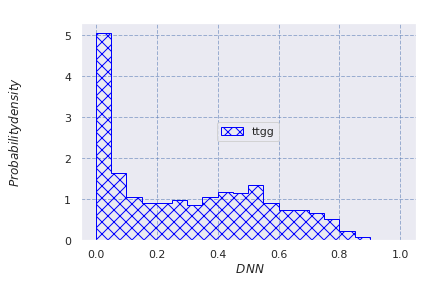

In [76]:
X_4_test = ttgg
y_4_test = np.ones(ttgg.shape[0])

loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_4_test, y_4_test)

# Final evaluation of the model for DNN
# Testing Outputs
scores = loaded_model.evaluate(X_4_test, y_4_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

import matplotlib
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = loaded_model.predict(X_4_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg_4 = tTest[y_4_test==0]
tSig_4 = tTest[y_4_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig_4, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='ttgg')
# n, bins, patches = plt.hist(tBkg_4, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'All Background')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
plt.title(' ')
# plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_with_HDF5_files/''output_TPrime1200_all_background.png')
plt.show()




##### ttjets

1320/1320 [==============================] - 0s 109us/step
Accuracy: 8.56%


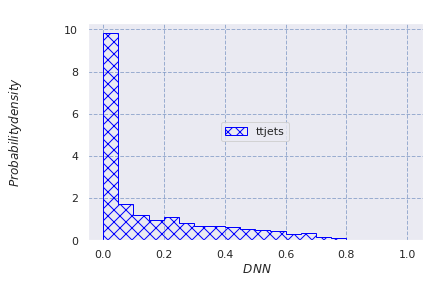

In [77]:
X_5_test = ttjets
y_5_test = np.ones(ttjets.shape[0])

loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_5_test, y_5_test)

# Final evaluation of the model for DNN
# Testing Outputs
scores = loaded_model.evaluate(X_5_test, y_5_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

import matplotlib
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = loaded_model.predict(X_5_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg_5 = tTest[y_5_test==0]
tSig_5 = tTest[y_5_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig_5, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='ttjets')
# n, bins, patches = plt.hist(tBkg_4, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'All Background')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
plt.title(' ')
# plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_with_HDF5_files/''output_TPrime1200_all_background.png')
plt.show()




##### diphotongamma 

8323/8323 [==============================] - 1s 106us/step
Accuracy: 14.56%


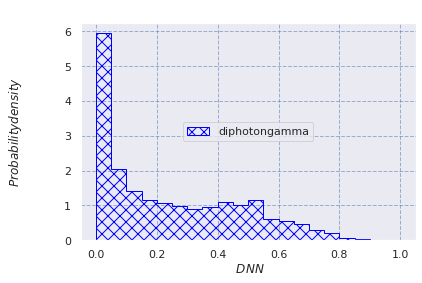

In [78]:
X_6_test = diphotongamma
y_6_test = np.ones(diphotongamma.shape[0])

loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_6_test, y_6_test)

# Final evaluation of the model for DNN
# Testing Outputs
scores = loaded_model.evaluate(X_6_test, y_6_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

import matplotlib
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = loaded_model.predict(X_6_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg_6 = tTest[y_6_test==0]
tSig_6 = tTest[y_6_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig_6, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='diphotongamma')
# n, bins, patches = plt.hist(tBkg_6, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'All Background')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
plt.title(' ')
# plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_with_HDF5_files/''output_TPrime1200_all_background.png')
plt.show()




##### gjets



228/228 [==============================] - 0s 133us/step
Accuracy: 5.26%


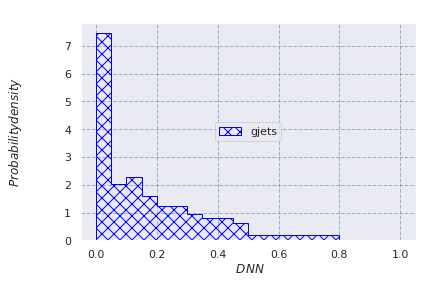

In [79]:
X_7_test = gjets
y_7_test = np.ones(gjets.shape[0])

loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_7_test, y_7_test)

# Final evaluation of the model for DNN
# Testing Outputs
scores = loaded_model.evaluate(X_7_test, y_7_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

import matplotlib
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = loaded_model.predict(X_7_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg_7 = tTest[y_7_test==0]
tSig_7 = tTest[y_7_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig_7, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='gjets')
# n, bins, patches = plt.hist(tBkg_6, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'All Background')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
plt.title(' ')
# plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_with_HDF5_files/''output_TPrime1200_all_background.png')
plt.show()




##### ttgjets 

9441/9441 [==============================] - 1s 121us/step
Accuracy: 19.26%


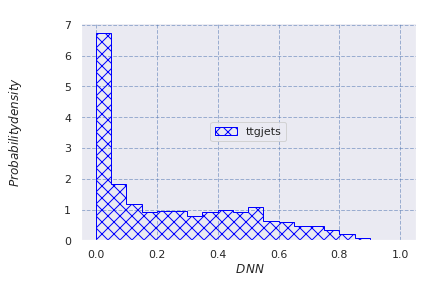

In [81]:
X_8_test = ttgjets
y_8_test = np.ones(ttgjets.shape[0])

loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_8_test, y_8_test)

# Final evaluation of the model for DNN
# Testing Outputs
scores = loaded_model.evaluate(X_8_test, y_8_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

import matplotlib
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = loaded_model.predict(X_8_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg_8 = tTest[y_8_test==0]
tSig_8 = tTest[y_8_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig_8, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='ttgjets')
# n, bins, patches = plt.hist(tBkg_6, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'All Background')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
plt.title(' ')
# plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_with_HDF5_files/''output_TPrime1200_all_background.png')
plt.show()


#### ttjets 


1320/1320 [==============================] - 0s 133us/step
Accuracy: 9.17%


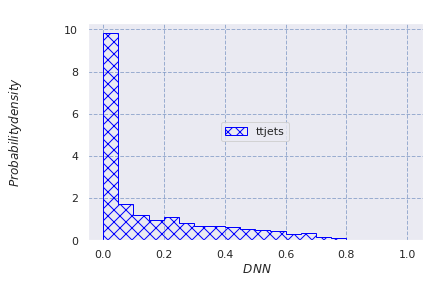

In [82]:
X_9_test = ttjets
y_9_test = np.ones(ttjets.shape[0])

loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_9_test, y_9_test)

# Final evaluation of the model for DNN
# Testing Outputs
scores = loaded_model.evaluate(X_9_test, y_9_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

import matplotlib
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = loaded_model.predict(X_9_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg_9 = tTest[y_9_test==0]
tSig_9 = tTest[y_9_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig_9, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='ttjets')
# n, bins, patches = plt.hist(tBkg_6, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'All Background')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
plt.title(' ')
# plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_with_HDF5_files/''output_TPrime1200_all_background.png')
plt.show()


#### Tprime_600


81013/81013 [==============================] - 9s 108us/step
Accuracy: 84.59%


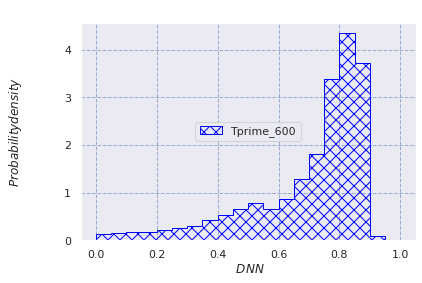

In [83]:
X_10_test = Tprime_600
y_10_test = np.ones(Tprime_600.shape[0])

loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_10_test, y_10_test)

# Final evaluation of the model for DNN
# Testing Outputs
scores = loaded_model.evaluate(X_10_test, y_10_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

import matplotlib
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = loaded_model.predict(X_10_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg_10 = tTest[y_10_test==0]
tSig_10 = tTest[y_10_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig_10, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='Tprime_600')
# n, bins, patches = plt.hist(tBkg_6, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'All Background')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
plt.title(' ')
# plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_with_HDF5_files/''output_TPrime1200_all_background.png')
plt.show()


#### Tprime_700

92703/92703 [==============================] - 10s 109us/step
Accuracy: 90.64%


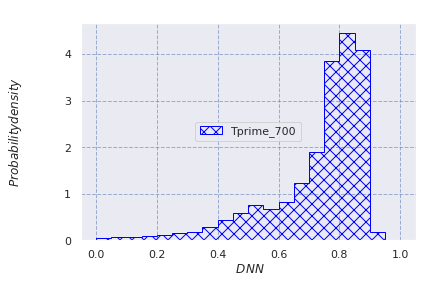

In [84]:
X_11_test = Tprime_700
y_11_test = np.ones(Tprime_700.shape[0])

loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_11_test, y_11_test)

# Final evaluation of the model for DNN
# Testing Outputs
scores = loaded_model.evaluate(X_11_test, y_11_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

import matplotlib
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = loaded_model.predict(X_11_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg_11 = tTest[y_11_test==0]
tSig_11 = tTest[y_11_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig_11, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='Tprime_700')
# n, bins, patches = plt.hist(tBkg_6, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'All Background')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
plt.title(' ')
# plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_with_HDF5_files/''output_TPrime1200_all_background.png')
plt.show()


##### SMHiggs 

441168/441168 [==============================] - 53s 119us/step
Accuracy: 25.01%


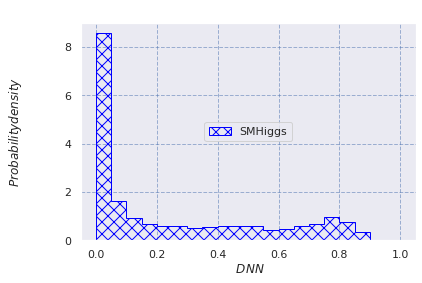

In [85]:
X_12_test = SMHiggs
y_12_test = np.ones(SMHiggs.shape[0])

loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_12_test, y_12_test)

# Final evaluation of the model for DNN
# Testing Outputs
scores = loaded_model.evaluate(X_12_test, y_12_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

import matplotlib
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = clf.predict(X_12_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg_12 = tTest[y_12_test==0]
tSig_12 = tTest[y_12_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig_12, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='SMHiggs')
# n, bins, patches = plt.hist(tBkg_6, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'All Background')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
plt.title(' ')
# plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_with_HDF5_files/''output_TPrime1200_all_background.png')
plt.show()


### Filiing the root file with output histogram

In [86]:
from ROOT import TCanvas, TPad, TFormula, TF1, TPaveLabel, TH1F, TFile,TH1D
from ROOT import gROOT, gBenchmark
f = TFile("/eos/user/s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Final_training/MyrootFile_with_increase_nodes_after_testing_on_training_Tprime_600-700_all_five_background.root", "RECREATE")
# tree = TTree("root",  )
# How do we get that to create and fill with the background and signal
# h_bak = TH1D("background", "background", 100, 0,1)
h_sig_1 = TH1D("datafile", "datafile", 40, 0, 1)
h_sig_2 = TH1D("ttgg", "ttgg", 40, 0, 1)
h_sig_3 = TH1D("ttjets", "ttjets", 40, 0, 1)
h_sig_4 = TH1D("diphotongamma", "diphotongamma", 40, 0, 1)
h_sig_5 = TH1D("gjets", "gjets", 40, 0, 1)
h_sig_6 = TH1D("ttgjets", "ttgjets", 40, 0, 1)
h_sig_7 = TH1D("Tprime_600", "Tprime_600", 40, 0, 1)
h_sig_8 = TH1D("Tprime_700", "ttjets", 40, 0, 1)
h_sig_9 = TH1D("SMHiggs", "ttjets", 40, 0, 1)

# h_sum_all = TH1D("data_obs", "data_obs", 100, 0, 1)
# for i in tBkg:
#     h_bak.Fill(i)
for j in tSig_3:
    h_sig_1.Fill(j)
for j in tSig_4:
    h_sig_2.Fill(j)
for j in tSig_5:
    h_sig_3.Fill(j)
for j in tSig_6:
    h_sig_4.Fill(j)
for j in tSig_7:
    h_sig_5.Fill(j)
for j in tSig_8:
    h_sig_6.Fill(j)
for j in tSig_10:
    h_sig_7.Fill(j)
for j in tSig_11:
    h_sig_8.Fill(j)
for j in tSig_12:
    h_sig_9.Fill(j)

# h_sum_all.Add(h_bak) 
# h_sum_all.Add(h_sig)



f.Write()
f.Close()



## Importing Weights

In [88]:
back_1 = '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_TTGG_0Jets_TuneCP5_13TeV_amcatnlo_madspin_pythia8.root'
back_002 = '/eos/user/p/prsaha/for_Shivam/output_TTJets_pythia8.root'
back_003 = '/eos/user/p/prsaha/for_Shivam/output_DiPhotonJetsBox_MGG-80toInf_13TeV-Sherpa.root'
back_004 = '/eos/user/p/prsaha/for_Shivam/output_DiPhotonJetsBox2BJets_MGG-80toInf_13TeV-Sherpa.root'
back_005 = '/eos/user/p/prsaha/for_Shivam/output_GJet_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_pythia8.root'
back_006 = '/eos/user/p/prsaha/for_Shivam/output_TTGJets_pythia8.root'
back_007 = '/eos/user/p/prsaha/for_Shivam/output_TTJets_pythia8.root'
Tprime_600 = '/eos/user/p/prsaha/for_Shivam/output_TprimeBToTH_Hgg_M-600_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root'
Tprime_700 = '/eos/user/p/prsaha/for_Shivam/output_TprimeBToTH_Hgg_M-700_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root'


treeName_back_1 ="tagsDumper/trees/ttgg_13TeV_THQLeptonicTag" 
treeName_back_002 ="tagsDumper/trees/ttjets_13TeV_THQLeptonicTag" 
treeName_back_003 ="tagsDumper/trees/DiPhotonJetsBox_13TeV_THQLeptonicTag" 
treeName_back_004 ="tagsDumper/trees/DiPhotonJetsBox2BJets_13TeV_THQLeptonicTag" 
treeName_back_005 ="tagsDumper/trees/gjets_13TeV_THQLeptonicTag" 
treeName_back_006 ="tagsDumper/trees/ttgjets_13TeV_THQLeptonicTag" 
treeName_back_007 ="tagsDumper/trees/ttjets_13TeV_THQLeptonicTag" 
treeName_600 = "tagsDumper/trees/Tprime_600_13TeV_THQLeptonicTag"
treeName_700 = "tagsDumper/trees/Tprime_700_13TeV_THQLeptonicTag"

In [89]:
weights = 'weight'

In [97]:
back_ttgg_Weight = root2array(back_1, treeName_back_1, weights)     # ttgg background(Not using this)
back_ttjets_Weight = root2array(back_002, treeName_back_002, weights)
back_diphotongamma_Weight = root2array(back_003, treeName_back_003, weights)
back_diphotongamma_1_Weight = root2array(back_004, treeName_back_004, weights)
back_gjets_Weight = root2array(back_005, treeName_back_005, weights)
back_ttgjets_Weight = root2array(back_006, treeName_back_006, weights)
back_ttjets_Weight = root2array(back_007, treeName_back_007, weights)


In [116]:
# signal_Tprime_600_Weight = root2array(Tprime_600, treeName_600, weights)   #Signal TPrime at 600GeV
# signal_Tprime_700_Weight = root2array(Tprime_700, treeName_700, weights)   #Signal TPrime at 625GeV

In [117]:
ttgg_Weight = pd.DataFrame(back_ttgg_Weight)
ttjets_Weight = pd.DataFrame(back_ttjets_Weight)
diphotongamma_Weight = pd.DataFrame(back_diphotongamma_Weight)
diphotongamma_1_Weight = pd.DataFrame(back_diphotongamma_1_Weight)
gjets_Weight = pd.DataFrame(back_gjets_Weight)
ttgjets_Weight = pd.DataFrame(back_ttgjets_Weight)
ttjets_Weight = pd.DataFrame(back_ttjets_Weight)
# Tprime_600_Weight = pd.DataFrame(signal_Tprime_600_Weight)
# Tprime_700_Weight= pd.DataFrame(signal_Tprime_700_Weight)

In [102]:
ttgg_Weight.shape
 

(55847, 1)

In [35]:
ttgg_Weight

NameError: name 'ttgg_Weight' is not defined

In [103]:
tSig_4.shape

(55847, 1)

In [ ]:
t

##### Adding weights to the ROOT File

In [105]:
from ROOT import TCanvas, TPad, TFormula, TF1, TPaveLabel, TH1F, TFile,TH1D
from ROOT import gROOT, gBenchmark

In [120]:
f = TFile("/eos/user/s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Final_training/MyrootFile_with_weight_on_ttgg_after_testing_on_training_Tprime_600-700_all_five_background.root", "RECREATE")
# tree = TTree("root",  )
# How do we get that to create and fill with the background and signal
# h_bak = TH1D("background", "background", 100, 0,1)

# h_sig_1 = TH1D("datafile", "datafile", 40, 0, 1)
h_sig_2 = TH1D("ttgg", "ttgg", 40, 0, 1)
# h_sig_3 = TH1D("ttjets", "ttjets", 40, 0, 1)
# h_sig_4 = TH1D("diphotongamma", "diphotongamma", 40, 0, 1)
# h_sig_5 = TH1D("gjets", "gjets", 40, 0, 1)
# h_sig_6 = TH1D("ttgjets", "ttgjets", 40, 0, 1)
# h_sig_7 = TH1D("Tprime_600", "Tprime_600", 40, 0, 1)
# h_sig_8 = TH1D("Tprime_700", "ttjets", 40, 0, 1)
# h_sig_9 = TH1D("SMHiggs", "ttjets", 40, 0, 1)

# h_sum_all = TH1D("data_obs", "data_obs", 100, 0, 1)
# for i in tBkg:
#     h_bak.Fill(i)

# for j in tSig_3:
#     h_sig_1.Fill(j)
for j in tSig_4:
    h_sig_2.Fill(j)

# for j in tSig_5:
#     h_sig_3.Fill(j)
# for j in tSig_6:
#     h_sig_4.Fill(j)
# for j in tSig_7:
#     h_sig_5.Fill(j)
# for j in tSig_8:
#     h_sig_6.Fill(j)
# for j in tSig_10:
#     h_sig_7.Fill(j)
# for j in tSig_11:
#     h_sig_8.Fill(j)
# for j in tSig_12:
#     h_sig_9.Fill(j)

# h_sum_all.Add(h_bak) 
# h_sum_all.Add(h_sig)



f.Write()
f.Close()



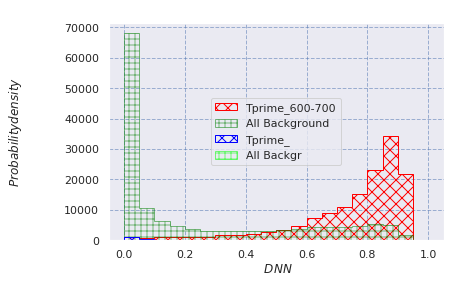

In [94]:
import matplotlib
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = loaded_model.predict(X_test)
tTest_1 = loaded_model.predict(X_3_test)
# tTest = loaded_model.predict(X_3_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg_0 = tTest[y_test==0]
tSig_0 = tTest[y_test==1]
tBkg_1 = tTest_1[y_3_test==0]
tSig_1 = tTest_1[y_3_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig_0,bins=bins, density=False, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'red', hatch = 'XX',label='Tprime_600-700')
n, bins, patches = plt.hist(tBkg_0, bins=bins, density=False, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'All Background')
n, bins, patches = plt.hist(tSig_1, bins=bins, density=False, histtype='step', fill=False, color ='cyan' ,edgecolor = 'blue', hatch = 'XX',label='Tprime_')
n, bins, patches = plt.hist(tBkg_1, bins=bins, density=False, histtype='step', fill=False,color = 'green' ,alpha=0.5, edgecolor = 'lime', hatch='++', label = 'All Backgr')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
plt.title(' ')
# plt.savefig('output_TPrime600_all_background.png')
plt.show()

In [98]:
signal_3 = data_File_1
backgr = pd.concat((back_tth, back_ggh, back_thq, back_vbf, back_vh), axis=0)

In [99]:
X_3 = np.concatenate((signal_3, backgr))
y_3 = np.concatenate((np.ones(signal_3.shape[0]),
                    np.zeros(backgr.shape[0])))

In [100]:
X_3_train,X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, test_size=0.99, random_state =5)


In [101]:
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_3_test, y_3_test)

439133/439133 [==============================] - 53s 120us/step


In [102]:
# Final evaluation of the model for DNN
# Testing Outputs
scores = loaded_model.evaluate(X_3_test, y_3_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

439133/439133 [==============================] - 209s 476us/step
Accuracy: 74.98%


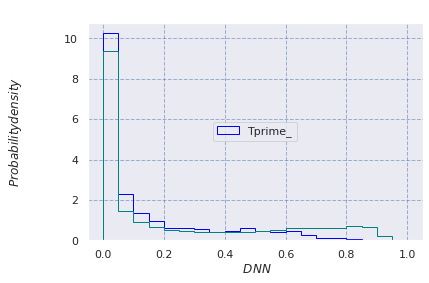

In [110]:
import matplotlib
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = loaded_model.predict(X_test)
tTest_1 = loaded_model.predict(X_3_test)
# tTest = loaded_model.predict(X_3_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg_0 = tTest[y_test==0]
tSig_0 = tTest[y_test==1]
tBkg_1 = tTest_1[y_3_test==0]
tSig_1 = tTest_1[y_3_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
# n, bins, patches = plt.hist(tSig_0,bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,alpha=1, edgecolor = 'red',label='Tprime_600-700')
# n, bins, patches = plt.hist(tBkg_0, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=1, edgecolor = 'black', label = 'All Background')
n, bins, patches = plt.hist(tSig_1, bins=bins, density=True, histtype='step', fill=False, color ='blue' ,alpha=1, edgecolor = 'blue',label='Tprime_')
n, bins, patches = plt.hist(tBkg_1, bins=bins, density=True, histtype='step', fill=False,color = 'green' ,alpha=1, edgecolor = 'teal')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
plt.title(' ')
# plt.savefig('output_TPrime600_all_background.png')
plt.show()

W0331 15:01:33.748734 140175835481920 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0331 15:01:34.096111 140175835481920 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0331 15:01:34.097384 140175835481920 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0331 15:01:34.126222 140175835481920 deprecation_wrapper.py:119] From /cvmfs/sft.c

In [30]:
# evaluate loaded model on test data of TPrime_600
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test)

290150/290150 [==============================] - 34s 118us/step


In [31]:
scores = loaded_model.evaluate(X_test, y_test, verbose=1)
print('It should be compatible with the previous output from the test dataset: \n'"Here the Accuracy ouput is: \n Accuracy: %.2f%%" % (scores[1]*100))


290150/290150 [==============================] - 38s 130us/step
It should be compatible with the previous output from the test dataset: 
Here the Accuracy ouput is: 
 Accuracy: 82.41%


In [32]:
print(X_test.shape)
print(y_test.shape)

(290150, 42)
(290150,)


# Testing on Tprime 800 and 900

In [33]:
Tprime_800 = '/eos/user/p/prsaha/for_Shivam/output_TprimeBToTH_Hgg_M-800_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root'
Tprime_900 = '/eos/user/p/prsaha/for_Shivam/output_TprimeBToTH_Hgg_M-900_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root'

In [34]:
treeName_800 = "tagsDumper/trees/Tprime_800_13TeV_THQLeptonicTag"
treeName_900 = "tagsDumper/trees/Tprime_900_13TeV_THQLeptonicTag"

In [35]:
signal_Tprime_800 = root2array(Tprime_800, treeName_800, columns)   #Signal TPrime at 600GeV
signal_Tprime_900 = root2array(Tprime_900, treeName_900, columns)   #Signal TPrime at 625GeV

In [36]:
signal_Tprime800= pd.DataFrame(signal_Tprime_800)
signal_Tprime900= pd.DataFrame(signal_Tprime_900)

In [38]:
signal_1 = pd.concat((signal_Tprime800, signal_Tprime900 ),axis = 0)
backgr = pd.concat((back_tth, back_ggh, back_thq, back_vbf, back_vh), axis=0)

In [39]:
X_1 = np.concatenate((signal_1, backgr))
y_1 = np.concatenate((np.ones(signal_1.shape[0]),
                    np.zeros(backgr.shape[0])))

In [40]:
X_1_train,X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.99, random_state =5)


In [41]:
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_1_test, y_1_test)

637453/637453 [==============================] - 134s 210us/step


In [42]:
# Final evaluation of the model for DNN
# Testing Outputs
scores = loaded_model.evaluate(X_1_test, y_1_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

637453/637453 [==============================] - 58s 90us/step
Accuracy: 74.83%


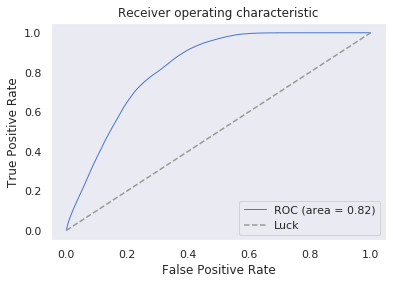

In [43]:
from sklearn.metrics import roc_curve, auc

decisions = loaded_model.predict(X_1_test)

# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(y_1_test, decisions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
# plt.savefig("ROC_curve.png")
plt.show()

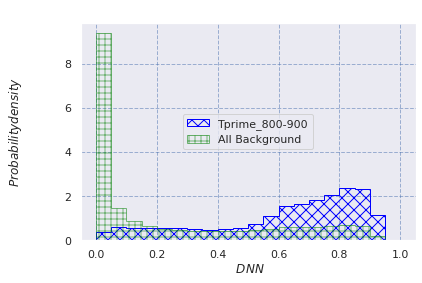

In [45]:
import matplotlib
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = loaded_model.predict(X_1_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg_1 = tTest[y_1_test==0]
tSig_1 = tTest[y_1_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig_1, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='Tprime_800-900')
n, bins, patches = plt.hist(tBkg_1, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'All Background')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
plt.title(' ')
# plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_with_HDF5_files/''output_TPrime1200_all_background.png')
plt.show()

# Method 2

In [46]:
X_2_test = signal_1
y_2_test = np.ones(signal_1.shape[0])

In [48]:
X_2_test.shape, y_2_test.shape

((202723, 42), (202723,))

In [49]:
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_2_test, y_2_test)

202723/202723 [==============================] - 23s 111us/step


In [51]:
# Final evaluation of the model for DNN
# Testing Outputs
scores = loaded_model.evaluate(X_2_test, y_2_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

202723/202723 [==============================] - 17s 85us/step
Accuracy: 73.71%


/cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
/cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/sklearn/metrics/ranking.py:113: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):


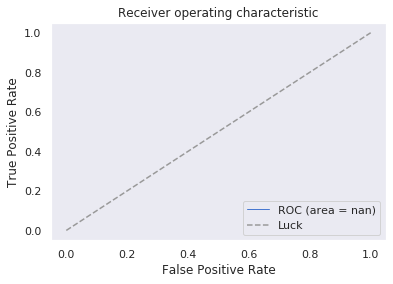

In [52]:
from sklearn.metrics import roc_curve, auc

decisions = loaded_model.predict(X_2_test)

# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(y_2_test, decisions)
roc_auc = auc(fpr, tpr)prime_800 GeV to 1000 GeV
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
# plt.savefig("ROC_curve.png")
plt.show()

/cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/numpy/lib/histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


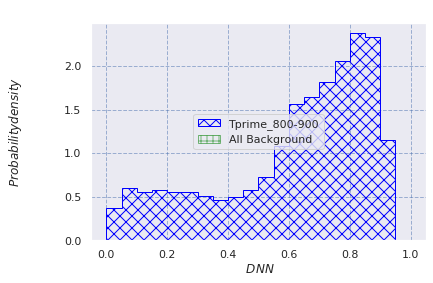

In [53]:
import matplotlib
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = loaded_model.predict(X_2_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg_1 = tTest[y_2_test==0]
tSig_1 = tTest[y_2_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig_1, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='Tprime_800-900')
n, bins, patches = plt.hist(tBkg_1, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'All Background')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
plt.title(' ')
# plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_with_HDF5_files/''output_TPrime1200_all_background.png')
plt.show()

# Testing on Tprime 1000 and 900

In [56]:
Tprime_1000 = '/eos/user/p/prsaha/for_Shivam/output_TprimeBToTH_Hgg_M-1000_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root'
Tprime_1100 = '/eos/user/p/prsaha/for_Shivam/output_TprimeBToTH_Hgg_M-1100_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root'
Tprime_1200 = '/eos/user/p/prsaha/for_Shivam/output_TprimeBToTH_Hgg_M-1200_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root'

In [57]:
treeName_1000 = "tagsDumper/trees/Tprime_1000_13TeV_THQLeptonicTag"
treeName_1100 = "tagsDumper/trees/Tprime_1100_13TeV_THQLeptonicTag"
treeName_1200 = "tagsDumper/trees/Tprime_1200_13TeV_THQLeptonicTag"

In [58]:
signal_Tprime_1000 = root2array(Tprime_1000, treeName_1000, columns)   #Signal TPrime at 600GeV
signal_Tprime_1100 = root2array(Tprime_1100, treeName_1100, columns)   #Signal TPrime at 625GeV
signal_Tprime_1200 = root2array(Tprime_1200, treeName_1200, columns)   #Signal TPrime at 625GeV

In [59]:
signal_Tprime1000= pd.DataFrame(signal_Tprime_1000)
signal_Tprime1100= pd.DataFrame(signal_Tprime_1100)
signal_Tprime1200= pd.DataFrame(signal_Tprime_1200)

In [66]:
signal_2 = pd.concat((signal_Tprime1000, signal_Tprime1100, signal_Tprime1200 ),axis = 0)
backgr = pd.concat((back_tth, back_ggh, back_thq, back_vbf, back_vh), axis=0)

In [63]:
X_2 = np.concatenate((signal_2, backgr))
y_2 = np.concatenate((np.ones(signal_1.shape[0]),
                    np.zeros(backgr.shape[0])))

In [64]:
X_2_train,X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.99, random_state =5)


In [65]:
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_2_test, y_2_test)

738427/738427 [==============================] - 75s 101us/step


In [67]:
# Final evaluation of the model for DNN
# Testing Outputs
scores = loaded_model.evaluate(X_2_test, y_2_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

738427/738427 [==============================] - 72s 97us/step
Accuracy: 59.39%


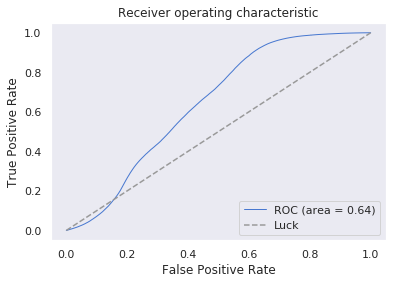

In [68]:
from sklearn.metrics import roc_curve, auc

decisions = loaded_model.predict(X_2_test)


# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(y_2_test, decisions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
# plt.savefig("ROC_curve.png")
plt.show()

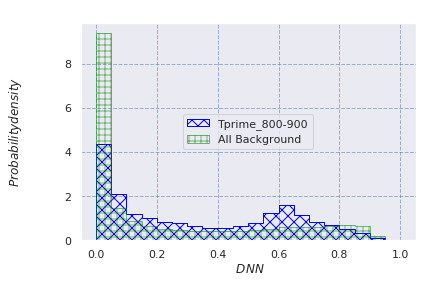

In [69]:
import matplotlib
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = loaded_model.predict(X_2_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg_1 = tTest[y_2_test==0]
tSig_1 = tTest[y_2_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig_1, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='Tprime_800-900')
n, bins, patches = plt.hist(tBkg_1, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'All Background')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
plt.title(' ')
# plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_with_HDF5_files/''output_TPrime1200_all_background.png')
plt.show()

### Testing on the each Tprime seperately in the for of method 2

### Testing on Tprime 600GeV

### Testing on Tprime 700GeV

### Testing on Tprime 800GeV

### Testing on Tprime 900GeV

### Testing on Tprime 1000GeV

### Testing on Tprime 1100GeV

### Testing on Tprime 1200GeV